In [1]:
import emcee
import corner
import speclite as speclite; from speclite import filters
from tqdm import tqdm
from matplotlib import cm
from matplotlib.artist import Artist
from chromatic import *
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from PyAstronomy import pyasl
from specutils.spectra import Spectrum1D, SpectralRegion
from specutils.fitting import fit_generic_continuum

transmission_data = np.loadtxt('../data/transmission_comp.txt')
mol_wave = transmission_data[:,0] * u.nm
mol_data = transmission_data[:,1]

In [2]:
NRES_Spectra = {
    
    "F21" : {
        
        "53" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "54" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "55" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "56" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "57" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "58" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "59" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "60" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "61" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "62" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "63" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "64" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "65" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "66" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "67" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "68" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "69" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "70" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "71" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "72" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "73" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "74" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "75" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "76" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "77" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "78" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "79" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "80" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "81" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "82" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "83" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        }   
    },
    
    "S22" : {
        "53" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "54" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "55" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "56" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "57" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "58" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "59" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "60" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "61" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "62" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "63" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "64" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "65" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "66" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "67" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "68" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "69" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "70" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "71" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "72" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "73" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "74" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "75" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "76" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "77" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "78" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "79" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "80" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "81" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "82" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "83" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        }   
    }
}

In [3]:
bandpass=np.linspace(3800.,10000.,400)*u.angstrom

#response functions

gp_data = np.loadtxt('../data/filter_curves/SDSS.gp.txt')
gp_response = gp_data[:,1]
gp_response[gp_response<0] = 0
gp_response[-1] = 0
rp_data = np.loadtxt('../data/filter_curves/SDSS.rp.txt')
rp_response = rp_data[:,1]
rp_response[rp_response<0] = 0
rp_response[-1] = 0
ip_data = np.loadtxt('../data/filter_curves/SDSS.ip.txt')
ip_response = ip_data[:,1]
ip_response[ip_response<0] = 0
ip_response[-1] = 0
LCO_gp = speclite.filters.FilterResponse(
    wavelength = gp_data[:,0]*10 * u.Angstrom,
    response = gp_response, meta=dict(group_name='sdss', band_name='gp'))
LCO_rp = speclite.filters.FilterResponse(
    wavelength = rp_data[:,0]*10 * u.Angstrom,
    response = rp_response, meta=dict(group_name='sdss', band_name='rp'))
LCO_ip = speclite.filters.FilterResponse(
    wavelength = ip_data[:,0]*10 * u.Angstrom,
    response = ip_response, meta=dict(group_name='sdss', band_name='ip'))

sdss_responses = speclite.filters.load_filters('sdss-gp','sdss-rp','sdss-ip')
response_g = sdss_responses[0].interpolator(bandpass)
response_r = sdss_responses[1].interpolator(bandpass)
response_i = sdss_responses[2].interpolator(bandpass)

## Spectrum normalization functions

In [4]:
def normalize_nres(data_flux,wavelength=None,**kwargs):
    
    flux = data_flux * u.erg
    
    _m = flux/np.nanmedian(flux)
    spectrum = Spectrum1D(flux=_m, spectral_axis=wavelength)
    with warnings.catch_warnings():  # Ignore warnings
        warnings.simplefilter('ignore')
        g1_fit = fit_generic_continuum(spectrum)
        continuum_fit = g1_fit(wavelength)
        
    normed_flux = _m/continuum_fit
    
    return normed_flux

In [5]:
def normalized_1T_PHOENIX(Tspec=3650,wavelength=None,**kwargs):
        
    _model = get_phoenix_photons(temperature=float(Tspec),wavelength=wavelength,
                                 logg=4.52, metallicity=0.0)
    
    _m = _model[1]/np.nanmedian(_model[1])
    spectrum = Spectrum1D(flux=_m, spectral_axis=_model[0])
    with warnings.catch_warnings():  # Ignore warnings
        warnings.simplefilter('ignore')
        g1_fit = fit_generic_continuum(spectrum)
        continuum_fit = g1_fit(_model[0])
        
    normed_model = _m/continuum_fit
    
    return normed_model

In [6]:
# def normalized_2T_PHOENIX(spot_params=[0.35,0.07,2500.,4000.],wavelength = None,
#                           spotspec=None,ambspec=None, **kwargs):
    
#     f_spot,df_spot,T_spot, T_amb = spot_params
    
#     _m = f_spot*spotspec[1] + (1.-f_spot)*ambspec[1]
#     normed_spec = _m/np.nanmedian(_m)
#     spectrum = Spectrum1D(flux=normed_spec, spectral_axis=wavelength)
#     with warnings.catch_warnings():  # Ignore warnings
#         warnings.simplefilter('ignore')
#         g1_fit = fit_generic_continuum(spectrum)
#         continuum_fit = g1_fit(wavelength)
#     model = normed_spec/continuum_fit
    
#     return model

In [16]:
def normalized_3T_PHOENIX(parameters=[0.02,0.3,0.06,8000,3000.,3800.],w1=None,w2=None, **kwargs):
    
    f_fac,f_spot,df_spot,T_fac,T_spot,T_amb = parameters
    f_amb = 1.0 - (f_fac + f_spot)
    
    S_hot_21 = get_phoenix_photons(temperature=int(parameters[3]),wavelength=w1,
                                   logg=4.52,metallicity=0.0)
    S_cool_21 = get_phoenix_photons(temperature=int(parameters[4]),wavelength=w1,
                                    logg=4.52,metallicity=0.0)
    S_mid_21 = get_phoenix_photons(temperature=int(parameters[5]),wavelength=w1,
                                   logg=4.52,metallicity=0.0)
    
    S_hot_22 = get_phoenix_photons(temperature=int(parameters[3]),wavelength=w2,
                                   logg=4.52,metallicity=0.0)
    S_cool_22 = get_phoenix_photons(temperature=int(parameters[4]),wavelength=w2,
                                    logg=4.52,metallicity=0.0)
    S_mid_22 = get_phoenix_photons(temperature=int(parameters[5]),wavelength=w2,
                                   logg=4.52,metallicity=0.0)
    
    _m = f_fac*S_hot_21[1] + f_spot*S_cool_21[1] + f_amb*S_mid_21[1]
    normed_spec = _m/np.nanmedian(_m)
    spectrum = Spectrum1D(flux=normed_spec, spectral_axis=S_hot_21[0])
    with warnings.catch_warnings():  # Ignore warnings
        warnings.simplefilter('ignore')
        g1_fit = fit_generic_continuum(spectrum)
        continuum_fit = g1_fit(S_hot_21[0])
    model21 = normed_spec/continuum_fit
    
    _m = f_fac*S_hot_22[1] + f_spot*S_cool_22[1] + f_amb*S_mid_22[1]
    normed_spec = _m/np.nanmedian(_m)
    spectrum = Spectrum1D(flux=normed_spec, spectral_axis=S_hot_22[0])
    with warnings.catch_warnings():  # Ignore warnings
        warnings.simplefilter('ignore')
        g1_fit = fit_generic_continuum(spectrum)
        continuum_fit = g1_fit(S_hot_22[0])
    model22 = normed_spec/continuum_fit
    
    return model21,model22

## Photometric variability model

In [17]:
def photometric_variability_model(parameters=None,plot=False,
                                  samples_exist=False,samples=None,
                                  label=None,title=None,
                                  **kwargs):
    
    f_fac,f_spot,df_spot,T_fac,T_spot,T_amb = parameters
    bandpass=np.linspace(3800.,10000.,400)*u.angstrom

    spotflux = get_phoenix_photons(temperature=int(T_spot), wavelength = bandpass,logg=4.52, metallicity=0.0)[1]
    ambflux = get_phoenix_photons(temperature=int(T_amb), wavelength = bandpass,logg=4.52, metallicity=0.0)[1]
    this_model_spectrum = f_spot*spotflux + (1.0-f_spot)*ambflux
                     
    d_lambda = (bandpass[1]-bandpass[0])
    contrast = 1.-(spotflux/ambflux)
    ds_over_s = -df_spot * ( contrast / ( 1.-f_spot * contrast ) )
    semi_amplitude = np.abs(ds_over_s)

    numerator = np.nansum(semi_amplitude*this_model_spectrum*response_g*d_lambda)
    denominator = np.nansum(this_model_spectrum*response_g*d_lambda)
    modelgp = numerator/denominator

    numerator = np.nansum(semi_amplitude*this_model_spectrum*response_r*d_lambda)
    denominator = np.nansum(this_model_spectrum*response_r*d_lambda)
    modelrp = numerator/denominator

    numerator = np.nansum(semi_amplitude*this_model_spectrum*response_i*d_lambda)
    denominator = np.nansum(this_model_spectrum*response_i*d_lambda)
    modelip = numerator/denominator

    if visit == 'F21':
        model = np.array([modelgp,modelrp,modelip])
        model_coords = [4750,6200,7550]
        w_err = [500,400,500]
        phot_data = np.array([0.076,0.072,0.040])
        phot_errs = np.array([0.006,0.006,0.007])
        
    if visit == 'S22':
        model = np.array([modelgp,modelrp])
        model_coords = [4750,6200]
        w_err = [500,400]
        phot_data = np.array([0.075,0.074])
        phot_errs = np.array([0.003,0.003])
        
    if visit == 'joint':
        model = np.array([modelgp,modelrp, modelip, modelgp, modelrp])
        model_coords = [4750,6200,7550,4750,6200]
        w_err = [500,400,500,500,400]
        phot_data = np.array([0.076,0.072,0.040,0.075,0.074])
        phot_errs = np.array([0.006,0.006,0.007,0.003,0.003])
        
    chisq = np.nansum((phot_data - model)**2./(phot_errs)**2.)
    err_weight = np.nansum(1./np.sqrt(2.*np.pi*(phot_errs)))
    ln_like = (err_weight - 0.5*chisq)
    
    return model, ln_like

## Spectral model

In [18]:
def avg_3T_spec_model(parameters=[0.02,0.3,0.06,8000,3000.,3800.],w1=None,
                      w2=None,f1=None,f2=None,e1=None,e2=None,
                      plot=False,ref_w=None,
                      samples_exist=False,samples=None,
                      label=None,title=None,**kwargs):
    
    model21,model22 = normalized_3T_PHOENIX(parameters=parameters,w1=w1,w2=w2)
    
    for i in range(len(model21)-1):
        if w1[i+1]-w1[i] >= 0.0002*u.micron:
            model21[i] = np.nan
            model21[i+1] = np.nan
            
    for i in range(len(model22)-1):
        if w2[i+1]-w2[i] >= 0.0002*u.micron:
            model22[i] = np.nan
            model22[i+1] = np.nan
    
    chisq = np.nansum((f1-model21)**2/(e1**2))
    err_weight = np.nansum(1./np.sqrt(2.*np.pi*(e1)))
    ln_like_21 = (err_weight - 0.5*chisq)
    
    chisq = np.nansum((f2-model22)**2/(e2**2))
    err_weight = np.nansum(1./np.sqrt(2.*np.pi*(e2)))
    ln_like_22 = (err_weight - 0.5*chisq)
    
    ln_like = ln_like_21+ln_like_22
    
    if plot:
        fig, [ax0,ax1] = plt.subplots(2,1,figsize=(6.5,4),sharex=True,gridspec_kw=dict(height_ratios=[1,0.3]))
        # fig.suptitle(f'{title}',fontsize=20)

        # Top plot, the processed data and combined model
        ax0.plot(w1, model21,color='red',zorder=100)
        ax0.plot(w2, model22-0.5,color='red',zorder=100)
        ax0.errorbar(w1, f1, yerr=e1, zorder=-100,
                     color='teal',label='F21 Avg. Spectrum',fmt='',alpha=1)
        ax0.errorbar(w2, f2-0.5, yerr=e2, zorder=-100,
                     color='teal',label='S22 Avg. Spectrum',fmt='',alpha=1)
        # ax0.set_ylim(0.4,1.3)
        ax0.set_ylabel('Rel. Flux',fontsize=9)
        ax0.legend(loc='upper right',fontsize=9)
        # The middle plot, residuals of the above data and model
        ax1.errorbar(w1,(f1-model21)/(e1),
                     yerr=1,zorder=100,color='gray',alpha=0.5)
        ax1.errorbar(w2,(f2-model22)/(e2),
                     yerr=1,zorder=100,color='green')
        ax1.set_ylabel(r'$\sigma$',fontsize=10)
        ax1.set_xlabel(r'$\lambda$ ($\mu$m)',fontsize=9,color='green',alpha=0.5)
        ax1.set_ylim(-4,4)
        # ax1.legend(loc='lower right')
        # ax1.axhspan(-1,1,color='red',alpha=0.2,zorder=10)
        # ax1.axhspan(-2,2,color='green',alpha=0.2,zorder=0)
        # ax1.axhspan(-3,3,color='gray',alpha=0.3,zorder=-10)
        # ax1.set_xlim(ref_w[0],ref_w[-1])
        ax1.axhline(0)

#         if samples_exist:
#             fhot_sam, fcool_sam, Thot_sam, Tcool_sam, Tmid_sam = samples  
#             for k in range(0,500):
#                 i = np.random.randint(low=0,high=(len(Tamb_sam)-1))
                
#                 parameters = [fhot_sam[i], fcool_sam[i], Thot_sam[i], Tcool_sam[i], Tmid_sam[i]]
                
#                 S_hot = get_phoenix_photons(temperature=int(parameters[2]),wavelength=wavelength,
#                                    logg=4.52,metallicity=0.0)
#                 S_cool = get_phoenix_photons(temperature=int(parameters[3]),wavelength=wavelength,
#                                                 logg=4.52,metallicity=0.0)
#                 S_mid = get_phoenix_photons(temperature=int(parameters[4]),wavelength=wavelength,
#                                                logg=4.52,metallicity=0.0)

#                 _model = normalized_3T_PHOENIX(spot_params=parameters,wavelength = wavelength,
#                                   hotspec=S_hot,coolspec=S_cool,ambspec=S_mid)

#                 for i in range(len(_model)-1):
#                     if wavelength[i+1]-wavelength[i] >= 0.0002*u.micron:
#                         _model[i] = np.nan
#                         _model[i+1] = np.nan
#                 ax0.plot(wavelength, _model, zorder=10, alpha=0.02, color='firebrick')

        plt.tight_layout()
        plt.savefig(f'../figs/{label}_specmodel.png',dpi=200)
        plt.show()
        plt.close()
    
    return model21, model22, ln_like

In [10]:
all_orders = np.array([53,54,55,56,57,58,59,
                        60,61,62,63,64,65,66,67,68,69,
                        70,71,72,73,74,75,76,77,78,79,
                        80,81,82,83])

for visit in tqdm(['F21','S22']):
    for order in tqdm(all_orders):
        _r = read_rainbow(f"../data/rainbows/{visit}_{order}_clipped.rainbow.npy")
        _ref_r = read_rainbow(f"../data/rainbows/{visit}_{order}_original.rainbow.npy")
        ref_r = _ref_r.trim()
        ref_w = ref_r.wavelength.value
        dw = _r.wavelength
        
        _1dspec = _r.get_average_spectrum()
        good_values = np.isfinite(_1dspec)
        
        data_wave = dw[good_values]
        # print(data_wave[3]-data_wave[0],ref_r.wavelength.unit)
        
        nres_avg_1dspec = normalize_nres(_1dspec[good_values], wavelength=data_wave)
        nres_avg_1derr = np.nanmedian(_r.uncertainty[good_values],axis=1)/np.sqrt(len(_r.timelike['time']))
        template_spec = normalized_1T_PHOENIX(Tspec=3650,wavelength=data_wave)
        rchisq = np.nansum((template_spec-nres_avg_1dspec)**2/(nres_avg_1derr)**2) / (len(data_wave)-1)
        if rchisq > 1.0:
            nres_avg_1derr = nres_avg_1derr * np.sqrt(rchisq)
            
        NRES_Spectra[f'{visit}'][f'{order}']['w'] = data_wave
        NRES_Spectra[f'{visit}'][f'{order}']['ref_w'] = ref_w
        NRES_Spectra[f'{visit}'][f'{order}']['f'] = nres_avg_1dspec
        NRES_Spectra[f'{visit}'][f'{order}']['e'] = nres_avg_1derr*1.25

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/188 [00:00<?, ?it/s]

  0%|          | 0/187 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

  0%|          | 0/68 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/158 [00:00<?, ?it/s]

  0%|          | 0/227 [00:00<?, ?it/s]

  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/146 [00:00<?, ?it/s]

  0%|          | 0/148 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/198 [00:00<?, ?it/s]

  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/208 [00:00<?, ?it/s]

  0%|          | 0/213 [00:00<?, ?it/s]

  0%|          | 0/190 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

  0%|          | 0/138 [00:00<?, ?it/s]

  0%|          | 0/178 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/170 [00:00<?, ?it/s]

  0%|          | 0/158 [00:00<?, ?it/s]

  0%|          | 0/124 [00:00<?, ?it/s]

  0%|          | 0/164 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/198 [00:00<?, ?it/s]

  0%|          | 0/187 [00:00<?, ?it/s]

  0%|          | 0/148 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/159 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/230 [00:00<?, ?it/s]

  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/143 [00:00<?, ?it/s]

  0%|          | 0/146 [00:00<?, ?it/s]

  0%|          | 0/82 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/191 [00:00<?, ?it/s]

  0%|          | 0/130 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/208 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/195 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/170 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/170 [00:00<?, ?it/s]

🌈🤖 The 4096 input wavelengths were not monotonically increasing.
<🌈(4096w, 47t)> has been sorted from lowest to highest wavelength.
If you want to recover the original wavelength order, the original
wavelength indices are available in `rainbow.original_wave_index`.

🌈🤖 The 4096 input wavelengths were not monotonically increasing.
<🌈(4096w, 47t)> has been sorted from lowest to highest wavelength.
If you want to recover the original wavelength order, the original
wavelength indices are available in `rainbow.original_wave_index`.

🌈🤖 The 4096 input wavelengths were not monotonically increasing.
<🌈(4096w, 47t)> has been sorted from lowest to highest wavelength.
If you want to recover the original wavelength order, the original
wavelength indices are available in `rainbow.original_wave_index`.



  0%|          | 0/157 [00:00<?, ?it/s]

🌈🤖 The 4096 input wavelengths were not monotonically increasing.
<🌈(4096w, 47t)> has been sorted from lowest to highest wavelength.
If you want to recover the original wavelength order, the original
wavelength indices are available in `rainbow.original_wave_index`.

🌈🤖 The 4096 input wavelengths were not monotonically increasing.
<🌈(4096w, 47t)> has been sorted from lowest to highest wavelength.
If you want to recover the original wavelength order, the original
wavelength indices are available in `rainbow.original_wave_index`.

🌈🤖 The 4096 input wavelengths were not monotonically increasing.
<🌈(4096w, 47t)> has been sorted from lowest to highest wavelength.
If you want to recover the original wavelength order, the original
wavelength indices are available in `rainbow.original_wave_index`.



  0%|          | 0/124 [00:00<?, ?it/s]

🌈🤖 The 4096 input wavelengths were not monotonically increasing.
<🌈(4096w, 47t)> has been sorted from lowest to highest wavelength.
If you want to recover the original wavelength order, the original
wavelength indices are available in `rainbow.original_wave_index`.

🌈🤖 The 4096 input wavelengths were not monotonically increasing.
<🌈(4096w, 47t)> has been sorted from lowest to highest wavelength.
If you want to recover the original wavelength order, the original
wavelength indices are available in `rainbow.original_wave_index`.

🌈🤖 The 4096 input wavelengths were not monotonically increasing.
<🌈(4096w, 47t)> has been sorted from lowest to highest wavelength.
If you want to recover the original wavelength order, the original
wavelength indices are available in `rainbow.original_wave_index`.



  0%|          | 0/170 [00:00<?, ?it/s]

## Define the log probability

In [40]:
def lnprob(parameters=None,**kwargs):

    f_fac,f_spot,df_spot,T_fac,T_spot,T_amb = parameters
    
    if (0.0<=f_fac<=0.5) and (0.0<=f_spot<=(1.0-f_fac)) and (0.0<=df_spot<=f_spot) and (12000.0>=T_fac>=T_amb>=T_spot>=2300.0):

        f_amb = 1.0 - (f_fac + f_spot)

        ln_like=0.0
        
        "Photometric variability likelihood"
        if do_Photometry:
            ln_like_phot = photometric_variability_model(parameters=parameters,visit=visit)[1]
            ln_like += ln_like_phot
        
        "Teff likelihood"
        Teff_model = ( f_fac*(T_fac**4.) + f_spot*(T_spot**4.) + f_amb*(T_amb**4.) )**(1./4.)    
        chisq_Teff = (3650. - Teff_model)**2./(100.)**2.
        err_weight_Teff = 1./np.sqrt(2.*np.pi*(100.))
        ln_like += (err_weight_Teff - 0.5*chisq_Teff)
        
        # for order in good_orders:
        "Spectral Decomposition likelihood"
        if do_Spectra:
            F21_wave = NRES_Spectra['F21'][f'{order}']['w']
            F21_flux = NRES_Spectra['F21'][f'{order}']['f']
            F21_err = NRES_Spectra['F21'][f'{order}']['e']

            S22_wave = NRES_Spectra['S22'][f'{order}']['w']
            S22_flux = NRES_Spectra['S22'][f'{order}']['f']
            S22_err = NRES_Spectra['S22'][f'{order}']['e'] 

            ln_like_spec = avg_3T_spec_model(parameters=parameters,w1=F21_wave,w2=S22_wave,
                                            f1=F21_flux,f2=S22_flux,e1=F21_err,e2=S22_err)[2]
            ln_like += ln_like_spec              

    else:
        ln_like = -np.inf

    return ln_like

## Make a wrapper for the sampler

In [41]:
def do_mcmc(label='oops you didnt label your samples :sadface:',
            nsteps=100,burnin=25,ndim=6,nwalkers=100,**kwargs):
    
    # these are initial parameters
    ffac_init = np.random.uniform(0.001, 0.05, nwalkers)
    fspot_init = np.random.uniform(0.1, 0.45, nwalkers)
    dfspot_init = np.random.uniform(0.01, 0.1, nwalkers)
    Tfac_init = np.random.uniform(8000, 10000, nwalkers)
    Tspot_init = np.random.uniform(2500, 3200, nwalkers)
    Tamb_init = np.random.uniform(3700, 4000, nwalkers)
    p0 = np.transpose([ffac_init, fspot_init,dfspot_init, Tfac_init, Tspot_init, Tamb_init])

    # set up file saving for the samples when finished
    filename = f"../data/samples/{label}.h5"
    backend = emcee.backends.HDFBackend(filename)
    backend.reset(nwalkers, ndim)
    
    # Initialize and run the sampler
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, backend=backend)
    result = sampler.run_mcmc(p0, nsteps,store=True, progress=False)
    samples = sampler.chain[:, burnin:, :].reshape((-1, ndim)).T

    for i in range(len(samples)):
        tau_f = emcee.autocorr.integrated_time(samples[i])
        print('(Nsteps-burnin)*nwalkers/tau=',(nsteps-burnin)*nwalkers/tau_f)
    
    return samples

## Run Teff + Spec Model

In [44]:
nsteps=1000
do_Photometry=True
do_Spectra=False
modeltype = 'variability_only'
visit = 'joint'

# Run the MCMC
print('beginning MCMC..')
samples = do_mcmc(label = f'{visit}_{modeltype}_{nsteps}steps',
                  nsteps = nsteps, burnin = int(0.25*nsteps))

beginning MCMC..
(Nsteps-burnin)*nwalkers/tau= [320.85009808]
(Nsteps-burnin)*nwalkers/tau= [212.86169082]
(Nsteps-burnin)*nwalkers/tau= [152.95662831]
(Nsteps-burnin)*nwalkers/tau= [153.60919237]
(Nsteps-burnin)*nwalkers/tau= [244.0230101]
(Nsteps-burnin)*nwalkers/tau= [304.1236398]


/Users/wiwa8630/opt/anaconda3/envs/the-lab/lib/python3.9/site-packages/corner/core.py:103: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(


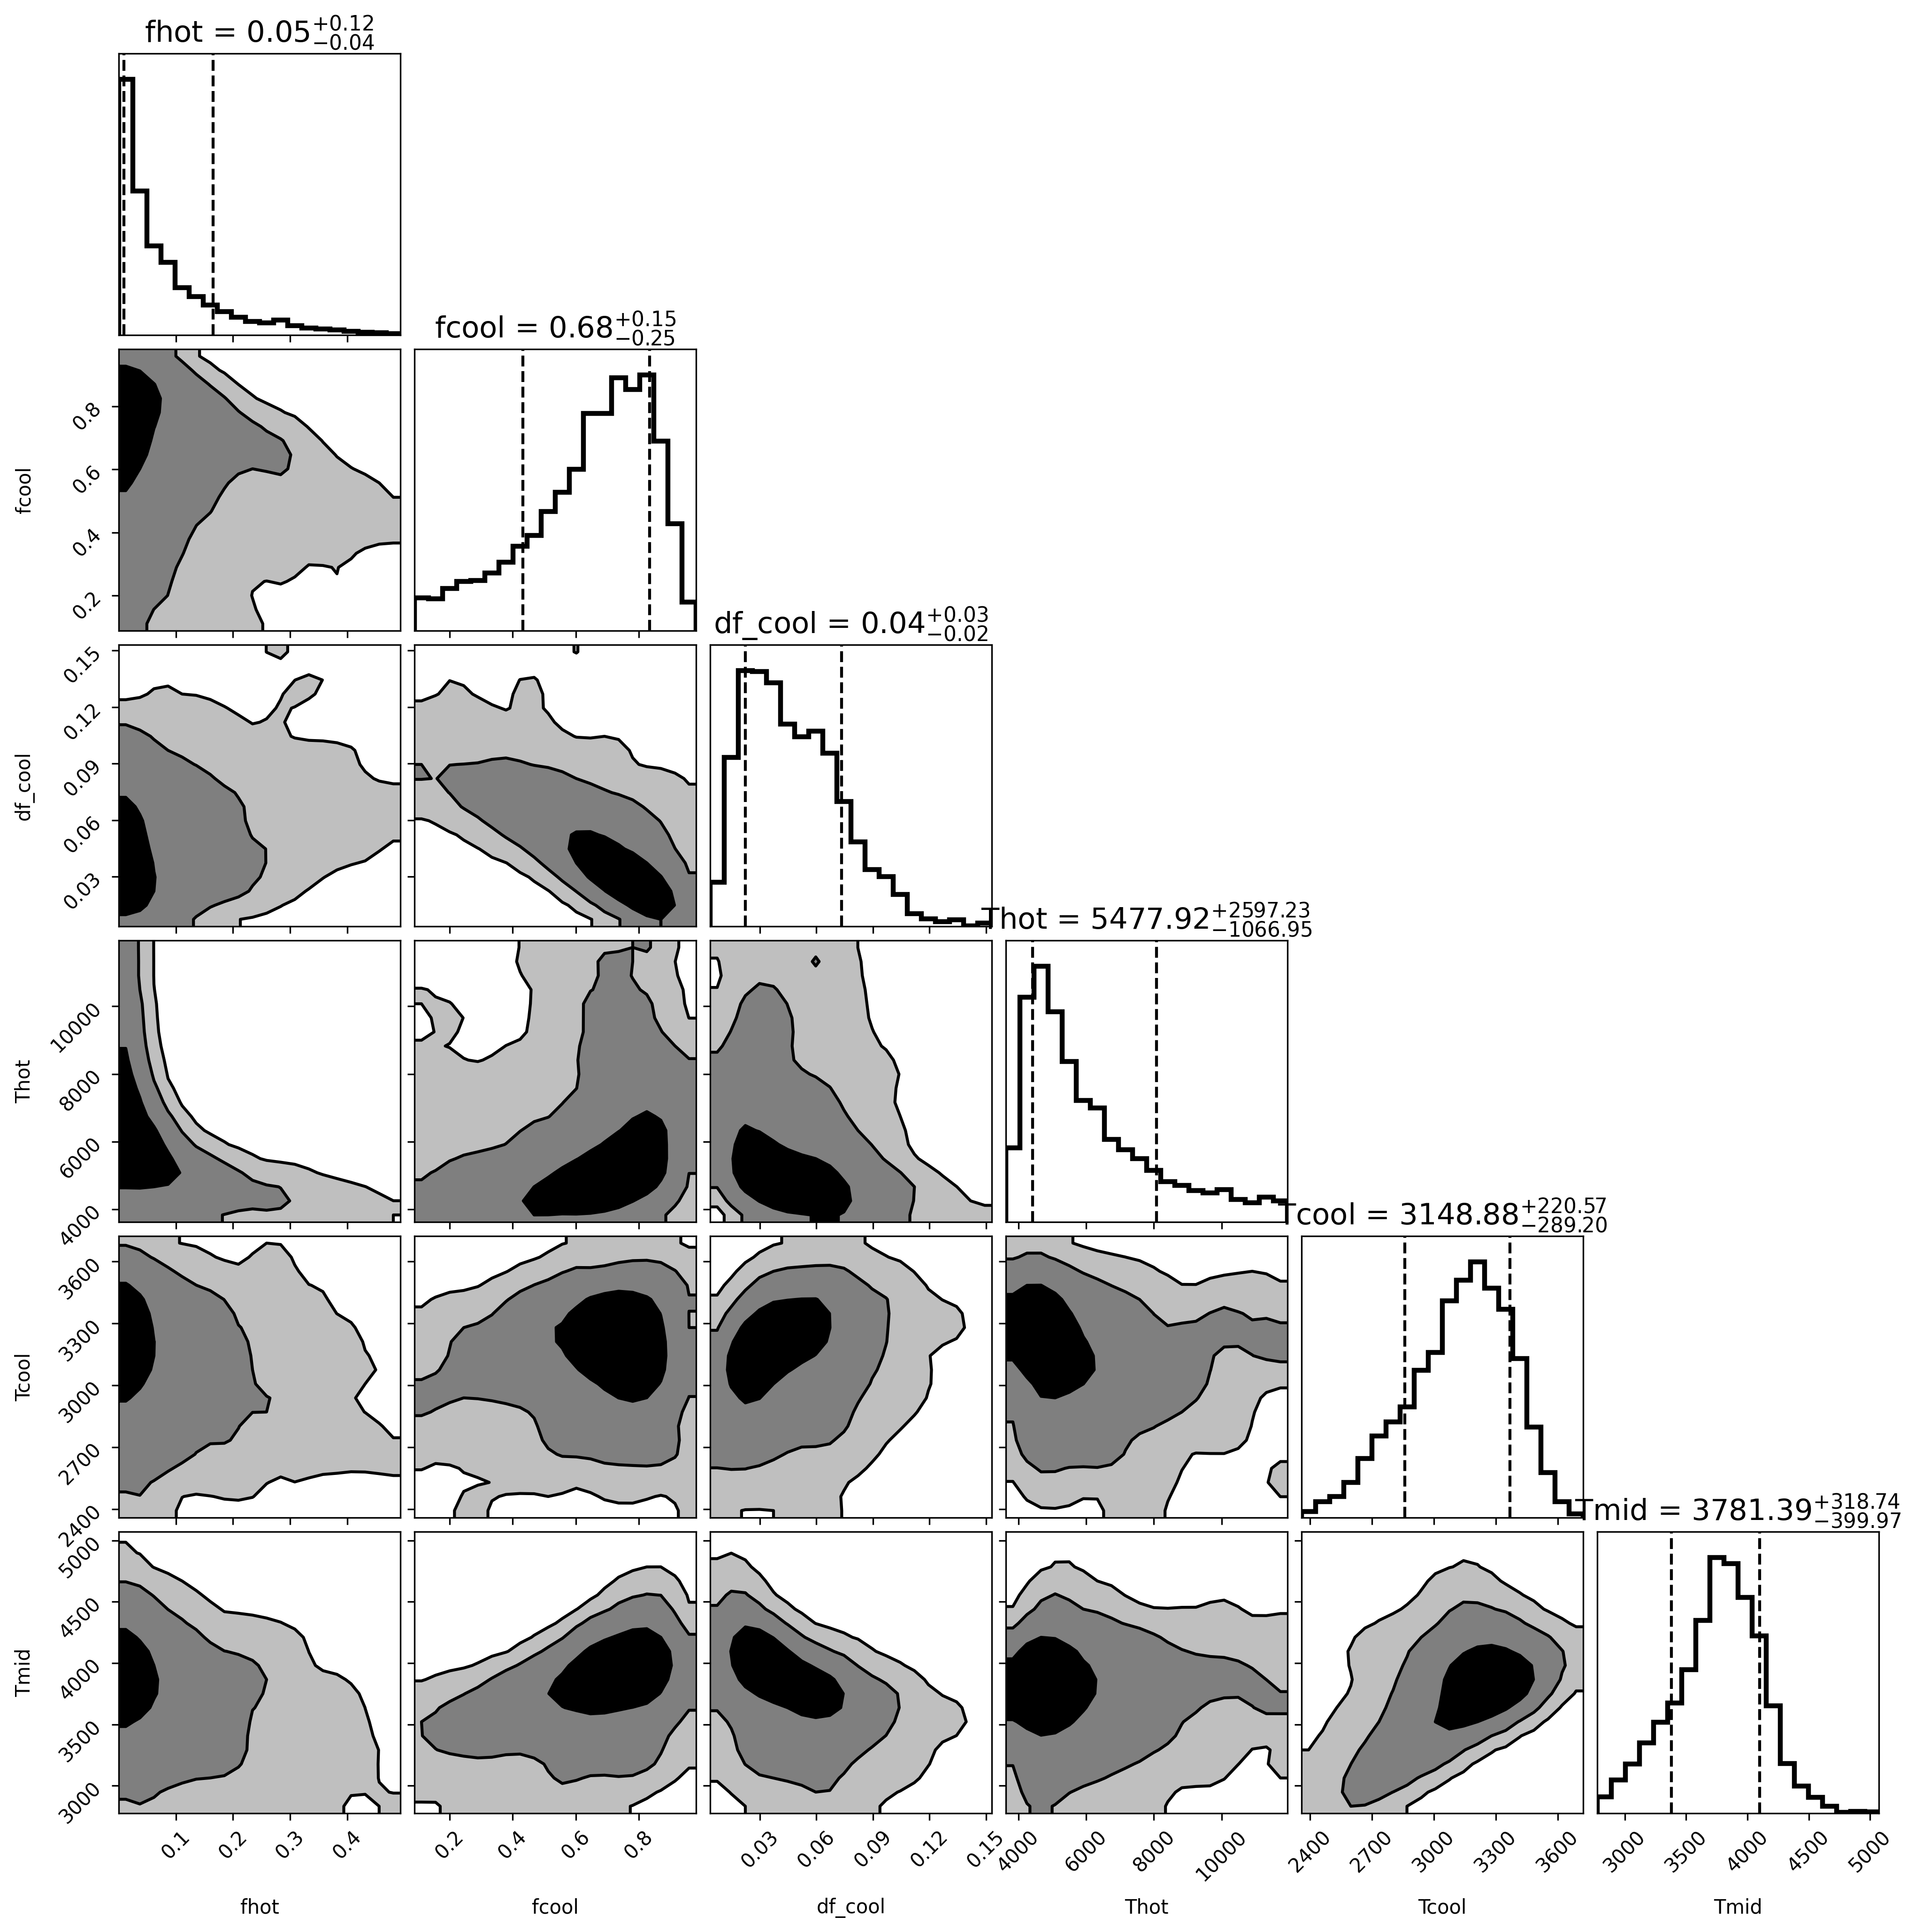

In [45]:
label = 'phot_model'
rng = 0.9995
fig = corner.corner( 
    samples.T,show_titles=True, labels=['fhot','fcool','df_cool','Thot','Tcool','Tmid'],
    range=[rng,rng,rng,rng,rng,rng],
    smooth=1,quantiles=(0.16, 0.84),
    fill_contours=True, plot_datapoints=False,title_kwargs={"fontsize": 15},title_fmt='.2f',
    hist_kwargs={"linewidth": 2.5},levels=[(1-np.exp(-0.5)),(1-np.exp(-2)),(1-np.exp(-4.5))]
)
plt.savefig(f'../figs/{label}_corner.png',dpi=200)
plt.show()
plt.close()

In [ ]:
nsteps = 500
do_Photometry=False
do_Spectra=True
modeltype = 'individual_orders_3T_Spec'
visit = 'joint'
orders_to_model = all_orders

for order in tqdm(orders_to_model):

    # Run the MCMC
    print('beginning MCMC..')
    samples = do_mcmc(label = f'{visit}_{order}_{modeltype}_{nsteps}steps',
                      nsteps = nsteps, burnin = int(0.25*nsteps))

  0%|          | 0/31 [00:00<?, ?it/s]

beginning MCMC..
